CC:  -0.002402564865898596


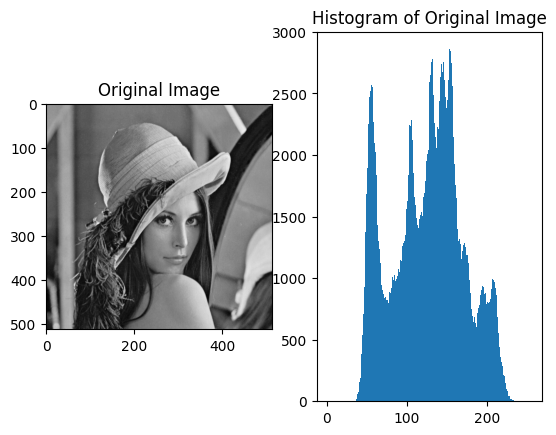

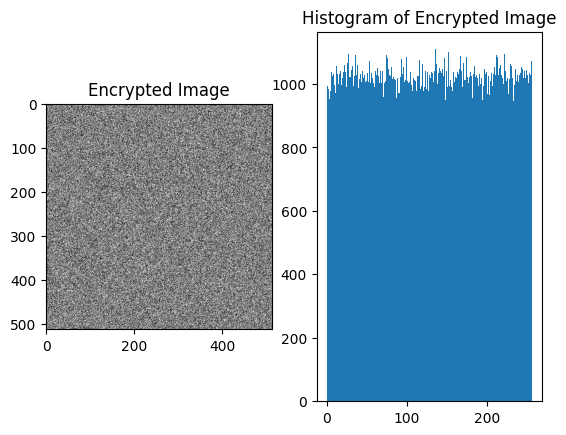

npcr:  100.0 %	Uaci:  34.71521863750383 %
Entropy Encrypted 7.999330053611692
Entropy Original 7.347884884304053


In [3]:
from PIL import Image
from numpy import array
import numpy as np
import key
import analysis
import random
import math
# Loading the image
img = Image.open('Lena.png')
# making an array of the original image
original_image_array = array(img)
height, width = original_image_array.shape


# Initialize the final image
# final_img = np.zeros((height, width), dtype=np.uint8)
final_img = np.full((height, width), -1, dtype=np.uint8)
# padded_image = np.zeros((1024, 1024), dtype=np.uint8)

# First subblock
# padded_image[:512, :512] = original_image_array

# Center the image
# center_x = int((1024 - original_image_array.shape[0]) / 2)
# center_y = int((1024 - original_image_array.shape[1]) / 2)
# padded_image[center_x:center_x+original_image_array.shape[0], center_y:center_y+original_image_array.shape[1]] = original_image_array

sum = key.pxsum(original_image_array)
sbox, initialx, initialp, x, p = key.sbox(sum, height, width)
# fsbox = key.fsbox(sbox)


def findshifted(sbox, x, val, prevshift):
    shifts = (val+(math.floor(x*256))+prevshift) % 256
    return sbox[shifts], shifts


def sub(matrix, sbox, x, p, final_img):
    prevshift = 0
    for _ in range(pow(10, 3)):
        x, p = key.mmap(x, p)
    height, width = matrix.shape
    bi, bj = 0, 0
    ei, ej = 511, 511
    for i in range(height):
        for j in range(width):
            x, p = key.mmap(x, p)
            px, prevshift = findshifted(sbox, x, matrix[i, j], prevshift)
            if (x <= 0.5):
                final_img[bi, bj] = px
                bj += 1
                if (bj >= 512):
                    bj = 0
                    bi += 1
            if (x > 0.5):
                final_img[ei, ej] = px
                ej -= 1
                if (ej < 0):
                    ej = 511
                    ei -= 1

    return final_img


final_img = sub(original_image_array, sbox, x, p, final_img)
# final_img = key.applyhenon(final_img, 1)
k = Image.fromarray(final_img)
k.save('./pics/final2603.png')

img2 = np.copy(original_image_array)
# x2 = random.randint(0, height)
# y2 = random.randint(0, width)
# img2[x2, y2] = random.randint(0, 255)
img2[0][0] = 150
# print(x2, y2)
# print(img2[x2, y2], original_image_array[x2, y2])
lk = Image.fromarray(img2)
lk.save("./pics/img2.png")
final_img2 = np.zeros((512, 512), dtype=np.uint8)
final_img2 = sub(img2, sbox, x, p, final_img2)
# print(final_img, "\n", final_img2)
# si = 0
# for i in range(height):
#     for j in range(width):
#         if (final_img[i, j] != final_img2[i, j]):
#             si += 1
# print(si)
print("CC: ", analysis.correlation_coefficient(original_image_array, final_img))
analysis.histogram(original_image_array, final_img)
npcr, uaci = analysis.NPCR_UACI_worker(final_img, final_img2)
print("npcr: ", npcr, "%\tUaci: ", uaci, "%")
print("Entropy Encrypted", analysis.entropy(final_img))
print("Entropy Original", analysis.entropy(original_image_array))
k2 = Image.fromarray(final_img2)
k2.save('./pics/final26032.png')
